<a href="https://colab.research.google.com/github/tincorpai/sklearn_projects/blob/master/clustering_Electronic_Health_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering for Electornic Health Dataset.


Clustering is an unsupervised learning technique which attempts to group objects together based on similarity. Clustering achieves this without using any labels, comparing how similar the data for one observation is to data for other observations and groups.

Clustering has many applications. One of the applications of clustering in real world dataset for example, electronic health record to group patients accoding to region and disease status.


In this project, we will be using the "electronic adoption and use by state dataset" to group patients with similar prescriptions

In [98]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [67]:
%cd '/content/drive/My Drive/Data_Science_Git/Clustering_projects'

/content/drive/My Drive/Data_Science_Git/Clustering_projects


In [68]:
data = pd.read_csv("surescripts-04-2014-state-csv-1(1).csv")
data.head()

,region,region_code,period,tot_e_Rx,tot_e_Rx_thru_ehr,tot_e_Rx_thru_stand_alone,tot_primary_care_e_Rx,tot_non_primary_care_e_Rx,tot_nurse_prac_e_Rx,tot_phys_asst_e_Rx,pct_new_renewal_e_Rx,tot_med_hist_reqs,tot_med_hist_req_resps,pct_pharm_enabled,pct_pharm_e_Rx
0,National,US,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN
1,National,US,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,NaN
2,National,US,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,National,US,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32,NaN,NaN,NaN,NaN
4,National,US,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.52,NaN,NaN,NaN,NaN


In [69]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     3824 non-null   object 
 1   region_code                3824 non-null   object 
 2   period                     3824 non-null   object 
 3   tot_e_Rx                   3511 non-null   float64
 4   tot_e_Rx_thru_ehr          3511 non-null   float64
 5   tot_e_Rx_thru_stand_alone  3511 non-null   float64
 6   tot_primary_care_e_Rx      2376 non-null   float64
 7   tot_non_primary_care_e_Rx  2376 non-null   float64
 8   tot_nurse_prac_e_Rx        2355 non-null   float64
 9   tot_phys_asst_e_Rx         2355 non-null   float64
 10  pct_new_renewal_e_Rx       311 non-null    float64
 11  tot_med_hist_reqs          2268 non-null   float64
 12  tot_med_hist_req_resps     2268 non-null   float64
 13  pct_pharm_enabled          2355 non-null   float

In [70]:
data.isnull().sum()

region                          0
region_code                     0
period                          0
tot_e_Rx                      313
tot_e_Rx_thru_ehr             313
tot_e_Rx_thru_stand_alone     313
tot_primary_care_e_Rx        1448
tot_non_primary_care_e_Rx    1448
tot_nurse_prac_e_Rx          1469
tot_phys_asst_e_Rx           1469
pct_new_renewal_e_Rx         3513
tot_med_hist_reqs            1556
tot_med_hist_req_resps       1556
pct_pharm_enabled            1469
pct_pharm_e_Rx                376
dtype: int64

In [71]:
data.columns

Index(['region', 'region_code', 'period', 'tot_e_Rx', 'tot_e_Rx_thru_ehr',
       'tot_e_Rx_thru_stand_alone', 'tot_primary_care_e_Rx',
       'tot_non_primary_care_e_Rx', 'tot_nurse_prac_e_Rx',
       'tot_phys_asst_e_Rx', 'pct_new_renewal_e_Rx', 'tot_med_hist_reqs',
       'tot_med_hist_req_resps', 'pct_pharm_enabled', 'pct_pharm_e_Rx'],
      dtype='object')

In [72]:
new_list = ['tot_e_Rx', 'tot_e_Rx_thru_ehr',
       'tot_e_Rx_thru_stand_alone', 'tot_primary_care_e_Rx',
       'tot_non_primary_care_e_Rx', 'tot_nurse_prac_e_Rx',
       'tot_phys_asst_e_Rx', 'pct_new_renewal_e_Rx', 'tot_med_hist_reqs',
       'tot_med_hist_req_resps', 'pct_pharm_enabled', 'pct_pharm_e_Rx']


health_record = data[new_list]

Initialize a KNN imputation model and fill in the missing values.

In [73]:
#Create a KNN imputer for missing imputation.
from  sklearn.impute import KNNImputer

impKNN = KNNImputer(n_neighbors=5)
newvalues = impKNN.fit_transform(health_record)

In [74]:
true_records = pd.DataFrame(newvalues, columns=new_list, index=health_record.index)

In [75]:
true_records.isnull().sum()

tot_e_Rx                     0
tot_e_Rx_thru_ehr            0
tot_e_Rx_thru_stand_alone    0
tot_primary_care_e_Rx        0
tot_non_primary_care_e_Rx    0
tot_nurse_prac_e_Rx          0
tot_phys_asst_e_Rx           0
pct_new_renewal_e_Rx         0
tot_med_hist_reqs            0
tot_med_hist_req_resps       0
pct_pharm_enabled            0
pct_pharm_e_Rx               0
dtype: int64

In [76]:
data.columns

Index(['region', 'region_code', 'period', 'tot_e_Rx', 'tot_e_Rx_thru_ehr',
       'tot_e_Rx_thru_stand_alone', 'tot_primary_care_e_Rx',
       'tot_non_primary_care_e_Rx', 'tot_nurse_prac_e_Rx',
       'tot_phys_asst_e_Rx', 'pct_new_renewal_e_Rx', 'tot_med_hist_reqs',
       'tot_med_hist_req_resps', 'pct_pharm_enabled', 'pct_pharm_e_Rx'],
      dtype='object')

In [77]:
data_merge = data[["region", "region_code", "period"]]
data_merge.head()

,region,region_code,period
0,National,US,2008
1,National,US,2009
2,National,US,2010
3,National,US,2011
4,National,US,2012


In [78]:
data_merge

,region,region_code,period
0,National,US,2008
1,National,US,2009
2,National,US,2010
3,National,US,2011
4,National,US,2012
...,...,...,...
3819,Wyoming,WY,2013-12
3820,Wyoming,WY,2014-01
3821,Wyoming,WY,2014-02
3822,Wyoming,WY,2014-03


In [79]:
%%capture
data_merge[new_list] = true_records[new_list]

In [80]:
data_merge.head()

,region,region_code,period,tot_e_Rx,tot_e_Rx_thru_ehr,tot_e_Rx_thru_stand_alone,tot_primary_care_e_Rx,tot_non_primary_care_e_Rx,tot_nurse_prac_e_Rx,tot_phys_asst_e_Rx,pct_new_renewal_e_Rx,tot_med_hist_reqs,tot_med_hist_req_resps,pct_pharm_enabled,pct_pharm_e_Rx
0,National,US,2008,12363.852179,10401.082313,1856.611222,5702.324074,9377.476431,1755.573248,988.95966,0.04,1.674085e+06,1.521452e+06,0.923168,0.872094
1,National,US,2009,12363.852179,10401.082313,1856.611222,5702.324074,9377.476431,1755.573248,988.95966,0.11,1.674085e+06,1.521452e+06,0.923168,0.872094
2,National,US,2010,12363.852179,10401.082313,1856.611222,5702.324074,9377.476431,1755.573248,988.95966,0.19,1.674085e+06,1.521452e+06,0.923168,0.872094
3,National,US,2011,12363.852179,10401.082313,1856.611222,5702.324074,9377.476431,1755.573248,988.95966,0.32,1.674085e+06,1.521452e+06,0.923168,0.872094
4,National,US,2012,12363.852179,10401.082313,1856.611222,5702.324074,9377.476431,1755.573248,988.95966,0.52,1.674085e+06,1.521452e+06,0.923168,0.872094


All missing values are filled in the dataset.

In [81]:
data_merge.isnull().sum()

region                       0
region_code                  0
period                       0
tot_e_Rx                     0
tot_e_Rx_thru_ehr            0
tot_e_Rx_thru_stand_alone    0
tot_primary_care_e_Rx        0
tot_non_primary_care_e_Rx    0
tot_nurse_prac_e_Rx          0
tot_phys_asst_e_Rx           0
pct_new_renewal_e_Rx         0
tot_med_hist_reqs            0
tot_med_hist_req_resps       0
pct_pharm_enabled            0
pct_pharm_e_Rx               0
dtype: int64

In [82]:
data_merge.region.unique()

array(['National', 'Alaska', 'Alabama', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Connecticut', 'District Of Columbia',
       'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho',
       'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota',
       'Missouri', 'Mississippi', 'Montana', 'North Carolina',
       'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey',
       'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

In [83]:
data_merge.region_code.unique()

array(['US', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype=object)

In [84]:
X = data_merge.drop(['region','region_code', 'period'], axis = 1)
y = data_merge['region_code']

In [85]:
X.shape

(3824, 12)

In [86]:
X_number_train =3059
X_number_train

3059

In [87]:
X_train = X.iloc[:X_number_train]
X_test = X.iloc[X_number_train:]

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
X_train_scaled

array([[2.12242093e-02, 1.94908586e-02, 2.30110519e-02, ...,
        2.39134430e-02, 9.32492655e-01, 8.80902997e-01],
       [2.12242093e-02, 1.94908586e-02, 2.30110519e-02, ...,
        2.39134430e-02, 9.32492655e-01, 8.80902997e-01],
       [2.12242093e-02, 1.94908586e-02, 2.30110519e-02, ...,
        2.39134430e-02, 9.32492655e-01, 8.80902997e-01],
       ...,
       [4.49867272e-04, 3.63541645e-04, 8.68055556e-04, ...,
        1.81778255e-04, 8.54545455e-01, 5.95959596e-01],
       [4.70471880e-04, 3.80406979e-04, 9.05257937e-04, ...,
        1.81778255e-04, 9.09090909e-01, 6.06060606e-01],
       [4.91076488e-04, 3.97272313e-04, 9.42460317e-04, ...,
        1.97541175e-04, 9.09090909e-01, 6.16161616e-01]])

### Finding optimum number of cluster



To finding the ideal number of groups to divide the data into is data stage in any unsupervised algorithm. One of the most common techniques figuring out this ideal value of K is the elbow approach.

In [95]:
%%capture
sse = []    #Sum of squared error
for K in range(1, 11):
  km = KMeans(n_clusters=K, random_state=2)
  km.fit(X_train_scaled)
  sse.append(km.inertia_)

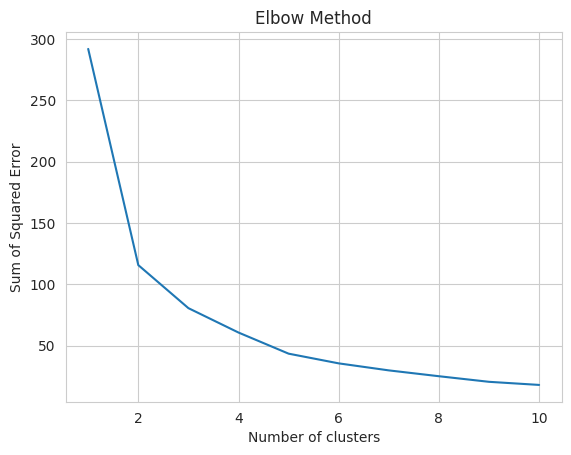

In [97]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1, 11), y=sse)
g.set(xlabel = "Number of clusters",
      ylabel = "Sum of Squared Error",
      title = "Elbow Method")

plt.show()

From the above graph, we can observe that k = 2 and k = 3 elbow-like situation. So, we are considering K=3

Build the Kmeans clustering model

In [104]:

kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X_train_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [102]:
kmeans.cluster_centers_

array([[6.07835932e-05, 3.18567421e-05, 2.40575397e-04, 5.98991317e-05,
        5.04447760e-05, 5.99017720e-05, 1.80547234e-05, 3.28154919e-01,
        1.75714886e-05, 1.63486183e-05, 1.16700337e-01, 1.66599327e-01],
       [6.81887245e-01, 6.32792993e-01, 6.99545387e-01, 6.78703691e-01,
        6.64458887e-01, 6.12452322e-01, 6.01942433e-01, 3.28154919e-01,
        6.12452375e-01, 5.93759674e-01, 9.36525253e-01, 9.22424242e-01],
       [1.31428025e-02, 1.19065297e-02, 1.52514680e-02, 1.31240091e-02,
        1.29727168e-02, 1.16983537e-02, 1.13544562e-02, 3.28302440e-01,
        1.19990944e-02, 1.16579266e-02, 9.28986160e-01, 8.87361783e-01]])

Predict the cluster group:

In [106]:
pred = kmeans.fit_predict(X_train_scaled)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [109]:


k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X_train_scaled.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters


{0: {'center': array([ 0.06919154,  1.78785042,  1.06183904, -0.87041662, -1.11581855,
          0.74488834, -1.33144319, -0.43023013,  0.47220939, -0.35227962,
         -1.99014048,  1.53612873]),
  'points': []},
 1: {'center': array([ 1.53979015, -0.79836124,  0.35832746,  1.91370766,  1.38037529,
         -1.73969824, -0.82102214, -0.84826224,  1.28986536,  0.50473215,
         -1.55808914, -1.99788476]),
  'points': []},
 2: {'center': array([ 1.76866493, -1.43399697, -0.3136139 , -0.61404224,  1.47914034,
         -0.28559275,  1.31500594,  0.87140735, -1.52309322,  0.38553669,
         -1.48097481, -1.68986363]),
  'points': []}}